In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import multiprocessing
from functools import partial
from PIL import Image

def get_files(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

def get_folders(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]

In [4]:
from os.path import join

ds_folder = '/home/ysheng/Dataset/general_dataset/'
cache_folder = join(ds_folder, 'cache/shadow_output')
obj_list = get_folders(cache_folder)
print('there are {} files'.format(len(obj_list)))

there are 89 files


In [5]:
def get_prefix_list(files):
    prefix_list = set()
    for f in files:
        if f.find('_mask') != -1:
            fname = os.path.basename(f)
            prefix_list.add(fname[:fname.find('_mask')])
    return list(prefix_list)

In [8]:
from sketch import sketch

In [7]:
for m in tqdm(obj_list):
    files = get_files(m)
    prefix_list = get_prefix_list(files)
    for prefix in prefix_list:
        normal_img, depth_img = plt.imread('{}_normal.png'.format(prefix)), plt.imread('{}_depth.png'.format(prefix))
        sketch_img = sketch(normal_img, depth_img)
        

  0%|          | 0/89 [00:00<?, ?it/s]

['pitch_45_rot_-45', 'pitch_30_rot_45', 'pitch_45_rot_45', 'pitch_30_rot_0', 'pitch_15_rot_0', 'pitch_30_rot_-45', 'pitch_15_rot_45', 'pitch_15_rot_-45', 'pitch_45_rot_0']


In [9]:
test_sketch = '/home/ysheng/Dataset/general_dataset/sketch/airplane_0061/pitch_15_rot_-45_sketch.png'
img = plt.imread(test_sketch)
print(img.shape)

(256, 256, 4)


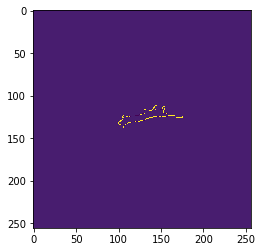

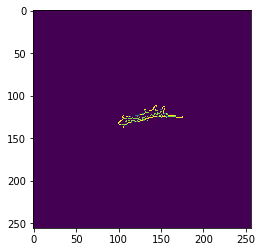

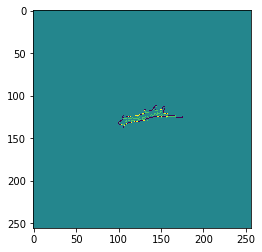

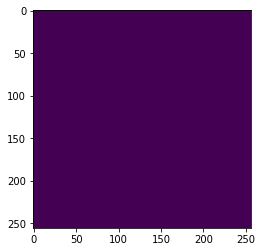

In [11]:
plt.figure()
plt.imshow(img[:,:,0])

plt.figure()
plt.imshow(img[:,:,1])

plt.figure()
plt.imshow(img[:,:,2])

plt.figure()
plt.imshow(img[:,:,3])